![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Andrew Maina
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## 1.0 Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

In [ ]:
## Business Understanding

Microsoft, an American multinational technology corporation, has taken interest in all the big companies that are creating products in the niche of **creating original video content** and wants to venture in as well.

They have created a movie studio but have inadequate knowledge and expertise to create movies.

This project explores trends in movies that are currently performing well in the market. Valuable information obtained will be used to provide actionable insights that can help Microsoft decide on the **type of films** to create.

## 2.0 Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Box Office Mojo

#### 1.1 Data
For this analysis, we will use the `bom.movie_gross` database

In [2]:
bom_movies = pd.read_csv('./zippedData/bom.movie_gross.csv.gz', encoding='utf-8')
bom_movies.sample(5)

,title,studio,domestic_gross,foreign_gross,year
2823,Happy Death Day,Uni.,55700000.0,69800000,2017
644,Rascals,Eros,274000.0,NaN,2011
1461,So Young,CL,11200.0,NaN,2013
2595,Viral,W/Dim.,NaN,552000,2016
271,The Good Heart,Magn.,20900.0,323000,2010


We can see that the dataset contains 5 columns:
1. title - The movie title
2. studio - The studio that produced the movie
3. domestic_gross - The gross revenue earned from the movie in the country of origin in USD dollars
4. foreign_gross - Gross earnings outside country of origin in US dollars
5. year - Year when the movie was released

The gross columns contains figures rounded up to 4 significant figures. Reference [BOM]()

In [4]:
bom_movies.describe(include="all")

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [5]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Based on the `.describe()` output,we have 3386 unique records. The data consists of movies released between `2010` and `2018`

The minimum domestic gross is `100.0000`USD and maximum is `936,700,000,000` USD. The `foreign gross` has missing data and unhelpful info at the moment.

There are 3387 entries in the dataset with `studio`, `domestic_gross` and `foreign_gross` with some empty data.
The data in `foreign_gross` column is an string object which means values have to be converted to numeric values.

In [7]:
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

There are `0` duplicate records indicated by no True values found.

In [19]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
bom_movies.isna().sum() / bom_movies.shape[0] * 100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

We can see that some columns have missing values:
1. studio - `0.1476%`
2. domestic_gross - `0.8267%`
3. foreign_gross - `39.86%`
---

### 2. IMDB Movies

The dataset used in this analysis are:
1. `imdb.title.basics` - This dataset contains basic information about movies
2. `imdb.title.ratings` - This dataset contains ratings for the movies specified in the `title.basics` dataset

#### 2.1 Title Basics

In [21]:
# Load the dataset
movies_basic_info = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movies_basic_info.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [25]:
# Get info about the columns and number of non-empty fields
movies_basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [24]:
# Get summary statistics
movies_basic_info.describe(include='all')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt3194382,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN


There are `146144` entries in the database. `original_title`, `runtime_minutes`, `types`, `attributes` and `genres` have some missing columns.

The dataset contains 6 columns:
1. tconst (string) - alphanumeric unique identifier of the title
2. primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
3. originalTitle (string) - original title, in the original language
4. startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
5. runtimeMinutes – primary runtime of the title, in minutes
6. genres (string array) – includes up to three genres associated with the title separated by commas

> Information about the columns can be found here - [IMDB title basics](https://developer.imdb.com/non-commercial-datasets/#titlebasicstsvgz)

---

In [26]:
# Find duplicate entries
movies_basic_info.duplicated().value_counts()

False    146144
dtype: int64

There are `0` duplicates in the data

In [27]:
# Find percentage of missing values in the dataframe
movies_basic_info.isna().sum() / movies_basic_info.shape[0] * 100

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

We can see that some columns have missing values:
1. original_title - `0.01437%`
2. runtime_minutes - `21.72%`
3. genres - `3.700%`
---

#### 2.1 Title Ratings

In [29]:
# Load the ratings dataset
movies_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movies_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [30]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [31]:
movies_ratings.describe(include='all')

,tconst,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt3194382,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


In [32]:
# Check for duplicates
movies_ratings.duplicated().value_counts()

False    73856
dtype: int64

In [33]:
movies_ratings.isna().sum() / 10e5 * 100

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

There are `73856` entries in the database. No columns are missing any data
The dataset contains 3 columns:

1. tconst (string) - alphanumeric unique identifier of the title
2. averageRating – weighted average of all the individual user ratings
3. numVotes - number of votes the title has received

Information about the columns can be found here - [IMDB title ratings](https://developer.imdb.com/non-commercial-datasets/#titleratingstsvgz)

---

## 3. Data Preparation

Based on exploring the datasets above, we can prepare them for further analysis by cleaning the data which includes:
1. Standardize the format of some columns of the data for easy analysis.
2. Identify missing values and use appropriate methods to handle them.
3. Create additional columns if need be, to obtain more insights or summary statistics
4. Drop unnecessary columns for the study

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
what are genres available
what is the most successful genre with respect to movies
which star cast has most movies
what are the movies with highest and lowest profits
what are the movies with highest runtime
Average revenue
what are the movies with highest and lowest budgets

#### 3.1 Box Office Mojo
For the BOM dataset, we have a number of columns to process. Let's take a look.

In [36]:
# Let's create a copy of the dataset to work with
bom_movies_clean = bom_movies.copy()
bom_movies_clean.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [37]:
bom_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Findings:
1. The studio, domestic and foreign gross columns have some missing values which have to be handled appropriately.
2. The foreign gross column has an object data type `string` which can be converted to `int` to use in further analysis and plotting.
3. The dataset does not contain info on genres thus not useful in getting insights about those trends.
4. The year column can be used to group data and find gross income statistics per year.
5. Further research can be done on the missing `studio` columns to see if they can be filled with correct values.

#### 3.1.1 Studio
Let's see what we can do with the studio column

In [39]:
# Find rows with missing data in the studio column
bom_movies_clean[bom_movies_clean['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [40]:
# Replace the missing columns with data from further online search
bom_movies_clean.at[210, 'studio'] = 'Cohen' # Cohen Media Group
bom_movies_clean.at[555, 'studio'] = 'Uni.' # Universal Pictures
bom_movies_clean.at[933, 'studio'] = 'Lionsgate'
bom_movies_clean.at[1862, 'studio'] = 'Indelible Media'
bom_movies_clean.at[2825, 'studio'] = 'Aamir Khan Productions'

In [41]:
bom_movies_clean[bom_movies_clean['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year


Info on studios was extracted from Wikipedia and IMDB search after which I searched the dataset for studio names that have part of if not the entire name of the studio. e.g `Uni.` for `Universal Pictures`.
1. [Secret Superstar](https://www.imdb.com/title/tt6108090/companycredits/?ref_=tt_dt_co#production)
2. [Plot for Peace](https://www.imdb.com/title/tt2679680/companycredits/?ref_=tt_dt_co#production)
3. [Outside the Law](https://www.imdb.com/title/tt1229381/companycredits/?ref_=tt_dt_co#distribution)
4. [Fireflies in the Garden - Wikipedia](https://www.google.com/search?q=fireflies+in+the+garden&sca_esv=579611265&ei=AZlHZeGoEu-J9u8PpNikmAM&gs_ssp=eJzj4tLP1TcwKis0NCszYPQST8ssSk3LyUwtVsjMUyjJSFVITyxKSc0DANk0DDo&oq=fireflies+in+the&gs_lp=Egxnd3Mtd2l6LXNlcnAiEGZpcmVmbGllcyBpbiB0aGUqAggAMgUQLhiABDIFEC4YgAQyBRAAGIAEMgUQLhiABDIFEAAYgAQyBRAAGIAEMgUQLhiABDIFEAAYgAQyBRAAGIAEMgUQLhiABDIjEC4YgAQYlwUY3AQY3gQY4AQY9AMY8QMY9QMY9gMY9wPYAQFIqEFQ0QpY-jhwA3gBkAEAmAGbA6ABsyaqAQgyLTE2LjEuMbgBA8gBAPgBAcICChAAGEcY1gQYsAPCAgcQLhiKBRhDwgIREC4YgwEYxwEYsQMY0QMYgATCAgsQABiABBixAxiDAcICCxAAGIoFGLEDGIMBwgILEC4YgAQYsQMYgwHCAhYQLhiKBRhDGJcFGNwEGN4EGN8E2AEBwgIHEAAYigUYQ8ICDhAuGIAEGLEDGMcBGNEDwgIEEAAYA8ICCxAuGIMBGLEDGIAEwgIIEAAYgAQYsQPCAggQLhiKBRiRAsICDhAuGIoFGLEDGIMBGJECwgIKEAAYigUYsQMYQ8ICChAuGLEDGIoFGEPCAgoQLhiKBRixAxhDwgImEC4YigUYkQIYlwUY3AQY3gQY4AQY9AMY8QMY9QMY9gMY9wPYAQHCAgoQLhiKBRjUAhhDwgIdEC4YigUYsQMYgwEYkQIYlwUY3AQY3gQY4ATYAQHCAg4QLhiKBRixAxjUAhiRAsICDRAuGIoFGLEDGIMBGEPCAg0QABiKBRixAxiDARhDwgILEAAYigUYsQMYkQLCAg4QLhjUAhixAxiKBRiRAsICCxAuGIAEGMcBGK8BwgIdEC4Y1AIYsQMYigUYkQIYlwUY3AQY3gQY3wTYAQHCAhQQLhiABBiXBRjcBBjeBBjfBNgBAcICIxAuGIAEGJcFGNwEGN4EGOAEGPQDGPEDGPUDGPYDGPcD2AEBwgIHEAAYgAQYCuIDBBgAIEGIBgGQBgi6BgYIARABGBQ&sclient=gws-wiz-serp)
5. [Keith Lemon:The Film]()

In [42]:
# For the domestic_gross column, let's get the statistics (i.e mean, mode, median)
bom_movies_domestic_mean = bom_movies_clean['domestic_gross'].mean()
bom_movies_domestic_median = bom_movies_clean['domestic_gross'].median()
bom_movies_domestic_mode = bom_movies_clean['domestic_gross'].mode(dropna=False)

print(f"Mean: {bom_movies_domestic_mean}")
print(f"Median: {bom_movies_domestic_median}")
print(f"Mode: {bom_movies_domestic_mode}")

Mean: 28745845.06698422
Median: 1400000.0
Mode: 0    1100000.0
dtype: float64


The mean is higher than the median, possibly due to movies that had very high gross income.
Let's plot a boxplot to see them

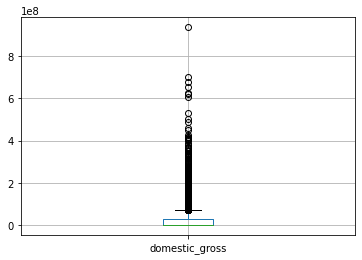

In [44]:
bom_movies_clean.boxplot(column='domestic_gross');

Findings:
* Most gross sales lie at `1,400,000 dollars` with some movies having larger sales.
* The mean sales is around `28,745,845.07 dollars` which could be influenced by the higher amount of sales in other movies.
* We can fill the null values in the dataset with the median gross sales to account for the missing `0.826690%` which is much less than half of the total entries.

In [45]:
# Fill missing values in domestic_gross with the median value
bom_domestic_gross_missing_before = bom_movies_clean['domestic_gross'].isna().sum()
bom_movies_clean['domestic_gross'].fillna(bom_movies_clean['domestic_gross'].median(), inplace=True)
bom_domestic_gross_missing_after = bom_movies_clean['domestic_gross'].isna().sum()
print(f"Null values before: {bom_domestic_gross_missing_before}")
print(f"Null values after: {bom_domestic_gross_missing_after}")

Null values before: 28
Null values after: 0


In [46]:
bom_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
# Clean the foreign_gross column and convert to numeric values
bom_movies_clean['foreign_gross'] = bom_movies_clean['foreign_gross'].apply(lambda x: float(str(x).replace(",", "")))
bom_movies_clean

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [49]:
bom_movies_clean.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

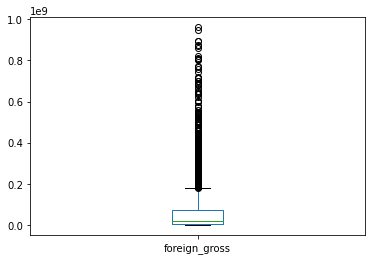

In [50]:
bom_movies_clean['foreign_gross'].plot.box();

In [52]:
# Get mean, median and mode
bom_movies_foreign_mean = bom_movies_clean['foreign_gross'].mean()
bom_movies_foreign_median = bom_movies_clean['foreign_gross'].median()
bom_movies_foreign_mode = bom_movies_clean['foreign_gross'].mode(dropna=False)

print(f"Mean: {bom_movies_foreign_mean}")
print(f"Median: {bom_movies_foreign_median}")
print(f"Mode: {bom_movies_foreign_mode}")

Mean: 74872810.15046637
Median: 18700000.0
Mode: 0   NaN
dtype: float64


In [54]:
bom_movies_clean['foreign_gross'].isna().sum() / bom_movies_clean.shape[0] * 100

39.85828166519043

* The boxplot shows that most gross sales lie at `~18million dollars` with some movies having larger sales.
* The mean sales is around `~74million dollars` which could be influenced by the higher amount of sales in other movies.
* We can fill the null values in the dataset with the median gross sales to account for the missing `39.86%` which is less than half of the total entries.

In [55]:
# Fill missing values with the median gross
bom_foreign_gross_missing_before = bom_movies_clean['foreign_gross'].isna().sum()
bom_movies_clean['foreign_gross'].fillna(bom_movies_clean['foreign_gross'].median(), inplace=True)
bom_foreign_gross_missing_after = bom_movies_clean['foreign_gross'].isna().sum()
print(f"Null values before: {bom_foreign_gross_missing_before}")
print(f"Null values after: {bom_foreign_gross_missing_after}")

Null values before: 1350
Null values after: 0


In [56]:
bom_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


All the fields are now filled and non-null for our analysis.

---

#### 3.2 IMDB
Let's take a look at the imdb datasets to see if any manipulation is necessary

In [60]:
# Copy the dataset to use in cleaning
movies_ratings_clean = movies_ratings.copy()
movies_ratings_clean.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [61]:
# Check rating info
movies_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [63]:
# Get summary stats
movies_ratings_clean.describe(include='all')

,tconst,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt3194382,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


In [64]:
# Check for duplicates
movies_ratings_clean.duplicated().value_counts()

False    73856
dtype: int64

Findings:
    
1. `Ratings` have neither duplicates nor missing values.
2. The average movie rating is `6.333`.
3. Rating ranges from `1` to `10`
4. We only have `73856` records in the ratings table while the basics table has `146144` records.
5. The common column in both is the `tconst` which is the unique identifier for a movie field.
6. We can combine the two tables using this column as the index using a left join to the ratings table to find insights for movies that have ratings.

In [65]:
movies_info_clean = movies_basic_info.copy()
movies_info_clean.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [68]:
# Looking back at missing values
movies_basic_info.isna().sum() / movies_basic_info.shape[0] * 100

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

The `original_title` and `primary_title` contain the name of the movie. We can drop the `original_title` column due to `avoid redundancy in the column values`

In [70]:
# Drop `original_title` column
movies_info_clean.drop(columns='original_title', inplace=True)

In [71]:
movies_info_clean.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [72]:
# Set the index columns for each dataset for JOIN operation
movies_info_clean.set_index('tconst', inplace=True)
movies_ratings_clean.set_index('tconst', inplace=True)

In [73]:
# Combine the datasets
movies_and_ratings = movies_ratings_clean.join(movies_info_clean)
movies_and_ratings

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
tconst,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,2019,NaN,"Action,Drama"


In [74]:
movies_and_ratings.shape

(73856, 6)

Nearly half of the records in the `movies_info` do not have corresponding ratings

---

## Data Modeling
Plots are made to get visual insights from the cleaned data for better analysis and discovery of trends, correlations etc.
***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

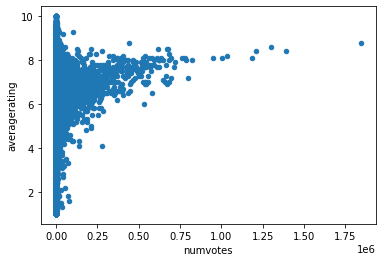

In [78]:
movies_and_ratings.plot(kind='scatter', x='numvotes', y='averagerating')
plt.show();

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***